# Keras Regression Learning - Housing Prices

### Exploritrory data analysis and Feature Engineering

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### No Missing Data

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Exploritrory data analysis

<AxesSubplot:xlabel='price', ylabel='Count'>

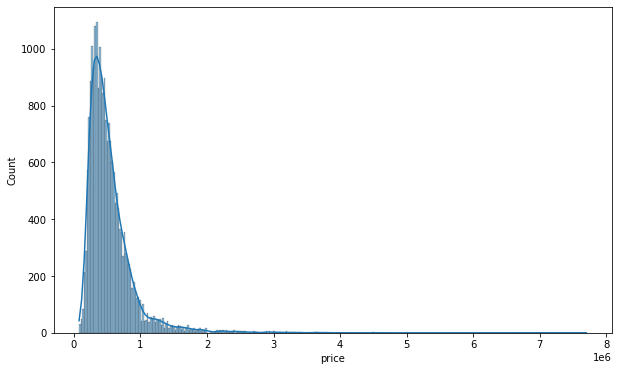

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],kde=True)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

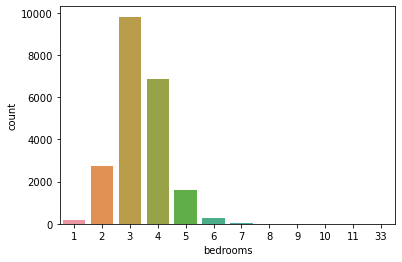

In [7]:
sns.countplot(x='bedrooms',data=df)

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

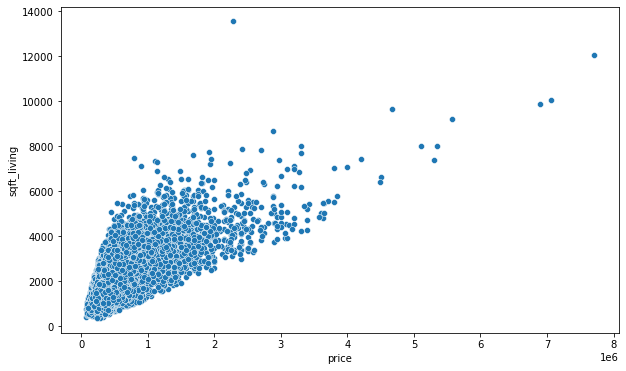

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

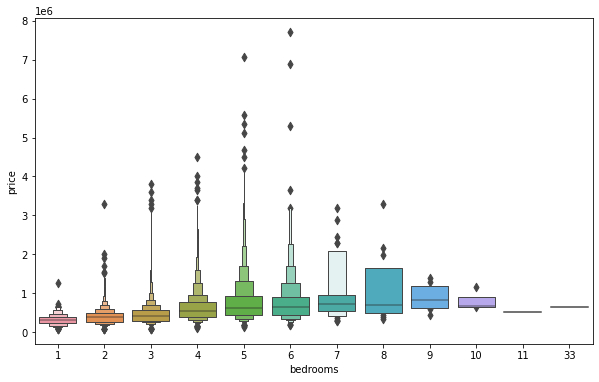

In [10]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='bedrooms',y='price',data=df)

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Geographical Properties

<AxesSubplot:xlabel='price', ylabel='lat'>

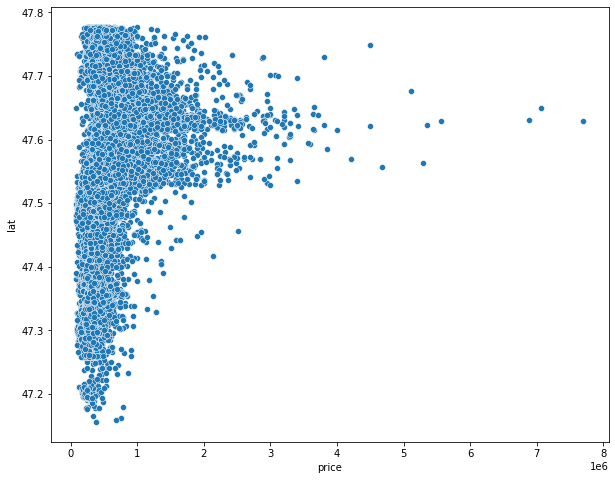

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

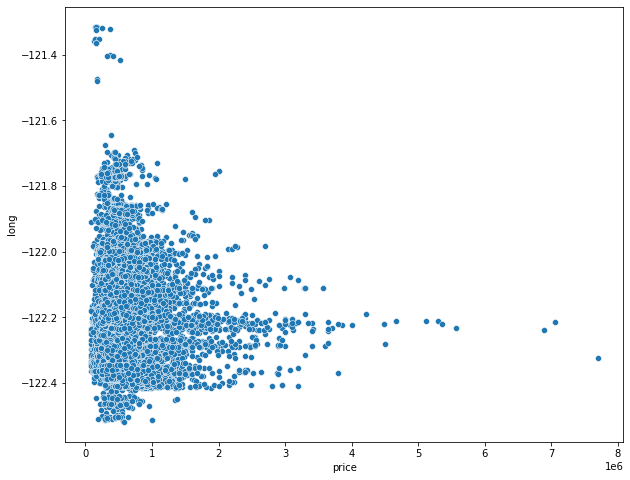

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

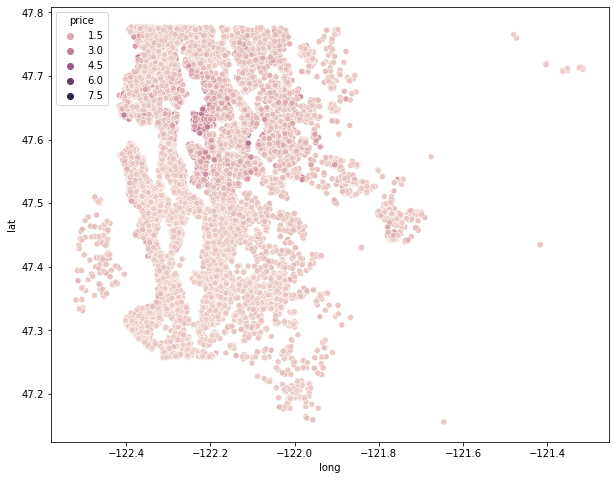

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [15]:
df.sort_values('price',ascending=False,).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
len(df)*0.01

215.97

In [20]:
non_top_oneperc = df.sort_values('price',ascending=False).iloc[216:]

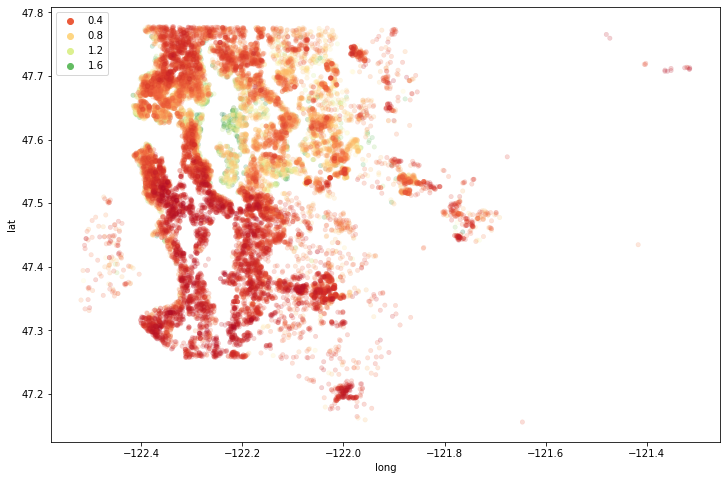

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_oneperc,
                 hue='price',edgecolor=None,alpha=0.2,
                palette='RdYlGn',s=20)
plt.legend()

<AxesSubplot:xlabel='waterfront', ylabel='price'>

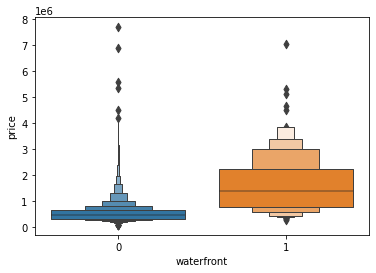

In [28]:
sns.boxenplot(x='waterfront',y='price',data=df)

# Feature Engineering: Extracting hidden features from the origina data

In [29]:
df = df.drop('id',axis=1)

In [30]:
df['date'] = pd.to_datetime(df['date'])

In [31]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [35]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

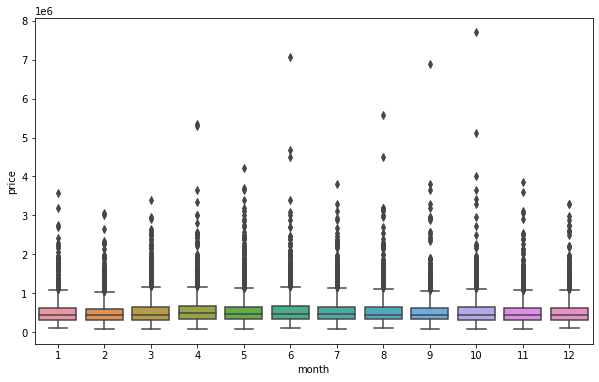

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

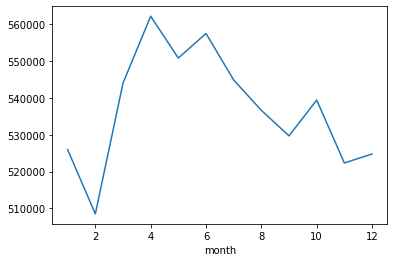

In [38]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

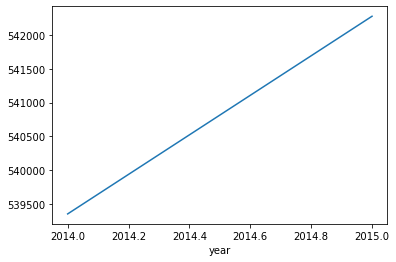

In [39]:
df.groupby('year').mean()['price'].plot()

In [40]:
df=df.drop('date',axis=1)

In [41]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

### With enough domain knowledge zip codes are treated as a categorical variable. But here since there are 70 zipcodes, it is dropped


In [42]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [43]:
df = df.drop('zipcode',axis=1)

### Year renovated needs to be treated as categorical. Here, it is either renovated or not renovated and is scaled by how recent the renovation took place

In [45]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [46]:
## Similarly for sqft_basement
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

# Modelling and learning

In [47]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
X_train = scaler.fit_transform(X_train)

In [54]:
X_test = scaler.transform(X_test)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [61]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430246297600.0000 - val_loss: 418946088960.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429221249024.0000 - val_loss: 415051186176.0000
Epoch 3/400
119/119 [==============================] - 1s 6ms/step - loss: 412121825280.0000 - val_loss: 374799532032.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 325251399680.0000 - val_loss: 236043911168.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 166964379648.0000 - val_loss: 107017617408.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 102338969600.0000 - val_loss: 96049127424.0000
Epoch 7/400
119/119 [==============================] - 1s 4ms/step - loss: 98375794688.0000 - val_loss: 94438326272.0000
Epoch 8/400
119/119 [==============================] - 1s 5ms/step - loss: 96609558528.0000 - val_loss: 92725903360.0000
Epoch 9/400
119/119 [

Epoch 135/400
119/119 [==============================] - 0s 4ms/step - loss: 32651145216.0000 - val_loss: 31037229056.0000
Epoch 136/400
119/119 [==============================] - 0s 4ms/step - loss: 32539695104.0000 - val_loss: 31048175616.0000
Epoch 137/400
119/119 [==============================] - 0s 4ms/step - loss: 32624699392.0000 - val_loss: 30992617472.0000
Epoch 138/400
119/119 [==============================] - 0s 4ms/step - loss: 32571021312.0000 - val_loss: 30942527488.0000
Epoch 139/400
119/119 [==============================] - 0s 4ms/step - loss: 32505882624.0000 - val_loss: 30906329088.0000
Epoch 140/400
119/119 [==============================] - 0s 4ms/step - loss: 32480292864.0000 - val_loss: 30941558784.0000
Epoch 141/400
119/119 [==============================] - 0s 4ms/step - loss: 32452700160.0000 - val_loss: 30877788160.0000
Epoch 142/400
119/119 [==============================] - 0s 4ms/step - loss: 32453992448.0000 - val_loss: 30810507264.0000
Epoch 143/400
11

119/119 [==============================] - 0s 4ms/step - loss: 30307356672.0000 - val_loss: 28275867648.0000
Epoch 268/400
119/119 [==============================] - 0s 4ms/step - loss: 30288214016.0000 - val_loss: 28320364544.0000
Epoch 269/400
119/119 [==============================] - 0s 4ms/step - loss: 30279532544.0000 - val_loss: 28342546432.0000
Epoch 270/400
119/119 [==============================] - 0s 4ms/step - loss: 30262956032.0000 - val_loss: 28239818752.0000
Epoch 271/400
119/119 [==============================] - 0s 4ms/step - loss: 30237743104.0000 - val_loss: 28240529408.0000
Epoch 272/400
119/119 [==============================] - 0s 4ms/step - loss: 30220529664.0000 - val_loss: 28275763200.0000
Epoch 273/400
119/119 [==============================] - 0s 4ms/step - loss: 30240086016.0000 - val_loss: 28200189952.0000
Epoch 274/400
119/119 [==============================] - 0s 4ms/step - loss: 30266843136.0000 - val_loss: 28171915264.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 1s 5ms/step - loss: 28455376896.0000 - val_loss: 26108397568.0000
Epoch 400/400
119/119 [==============================] - 1s 5ms/step - loss: 28443924480.0000 - val_loss: 26167664640.0000


In [62]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

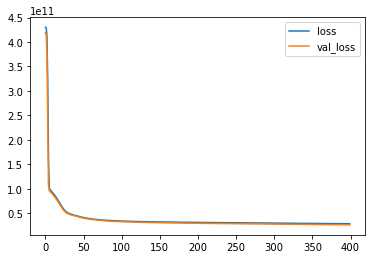

In [64]:
losses.plot()

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [69]:
predictions = model.predict(X_test)

In [71]:
# RMSE
np.sqrt(mean_squared_error(y_test,predictions))

161764.23142884547

In [72]:
mean_absolute_error(y_test,predictions)

100599.03083887925

In [73]:
explained_variance_score(y_test,predictions)

0.8032242093520519

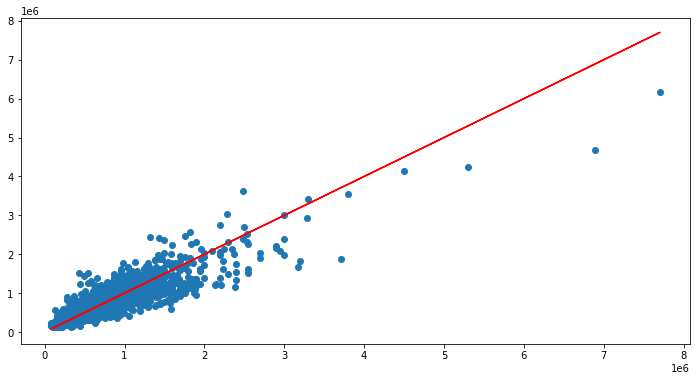

In [76]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r-')

In [77]:
single_house = df.drop('price',axis=1).iloc[0]

In [79]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [80]:
model.predict(single_house)

array([[279611.16]], dtype=float32)